# Advertising Channel Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing Important Libraries

In [41]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Here viewing first 5 rows

In [42]:
df.shape

(200, 5)

Here we can see 200 rows and 4 Columns

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Here we can see data type and there is missing value

In [44]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Here we can see mean,standard deviation

<AxesSubplot:>

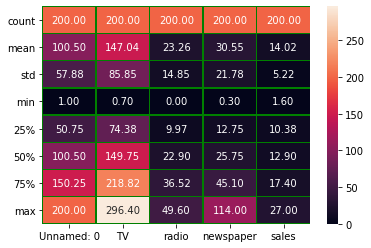

In [45]:
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.2f')

Heatmap of important attribution in data

In [46]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

This data does not have Missing values

In [47]:
(df == 0).astype(bool).sum(axis=0)

Unnamed: 0    0
TV            0
radio         1
newspaper     0
sales         0
dtype: int64

Here Radio have a zero value

In [48]:
df=df.replace(0,df.mean())

Replacing the Zero Value with mean of Column

In [49]:
(df == 0).astype(bool).sum(axis=0)

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Checking data after replacing zero with mean. the data doesnot have missing value.

Skewness for tha Column is 
 newspaper     0.894720
sales         0.407571
radio         0.091961
Unnamed: 0    0.000000
TV           -0.069853
dtype: float64


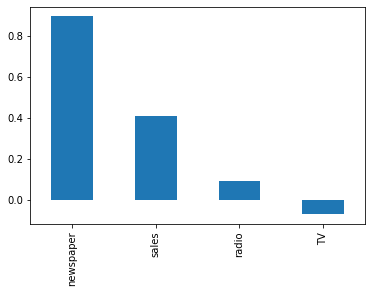

In [51]:
sk=df.skew().sort_values(ascending=False)
print('Skewness for tha Column is','\n',sk)
skew.plot(kind='bar')
plt.show()

Figure Showing skewness of data . SHowing Newpaper column having high skewness.

<AxesSubplot:xlabel='sales', ylabel='TV'>

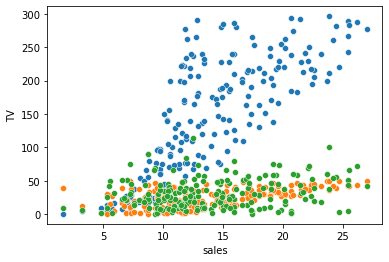

In [54]:
sns.scatterplot(x=df['sales'],y=df['TV'])
sns.scatterplot(x=df['sales'],y=df['radio'])
sns.scatterplot(x=df['sales'],y=df['newspaper'])

This plot shows that Sales increases maximum with TV

<AxesSubplot:xlabel='sales', ylabel='count'>

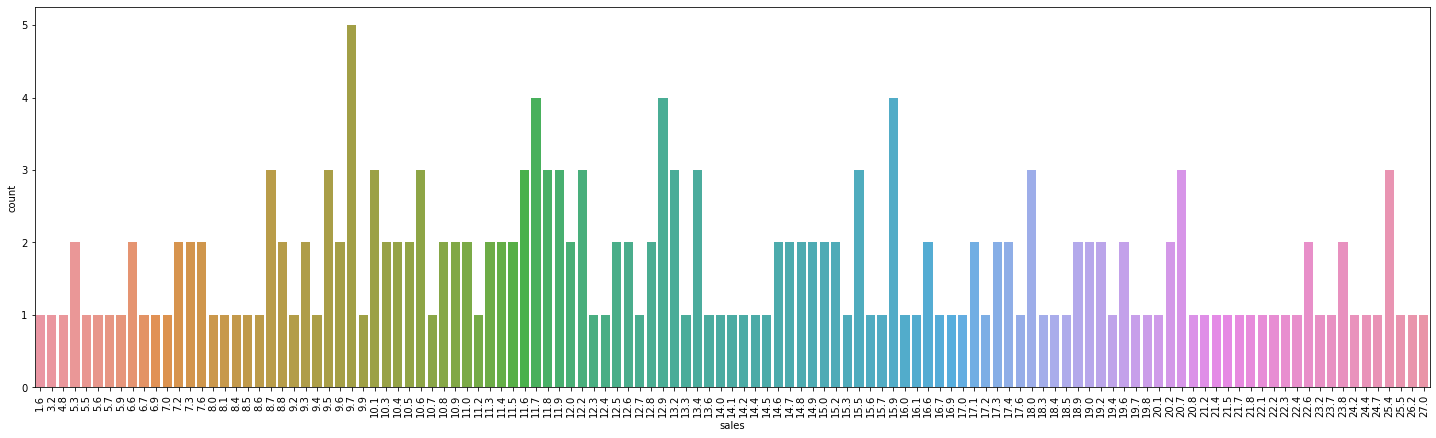

In [55]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
sns.countplot(x='sales',data=df)

In [ ]:
Count Plot of Sales showing 9.7 having the highest count.

sales        1.000000
TV           0.782224
radio        0.571898
newspaper    0.228299
Name: sales, dtype: float64


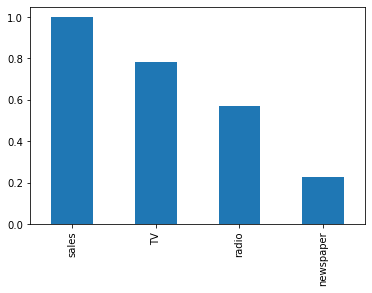

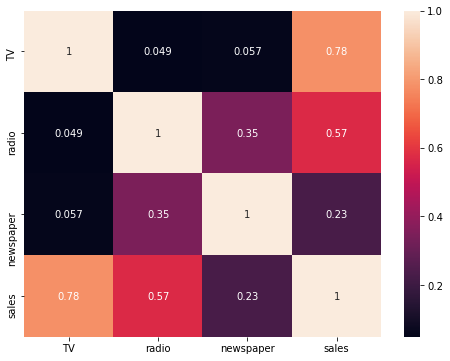

In [77]:
cor=df.corr()['sales'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

This Heat map shows that correlation between TV and Sales is the highest.

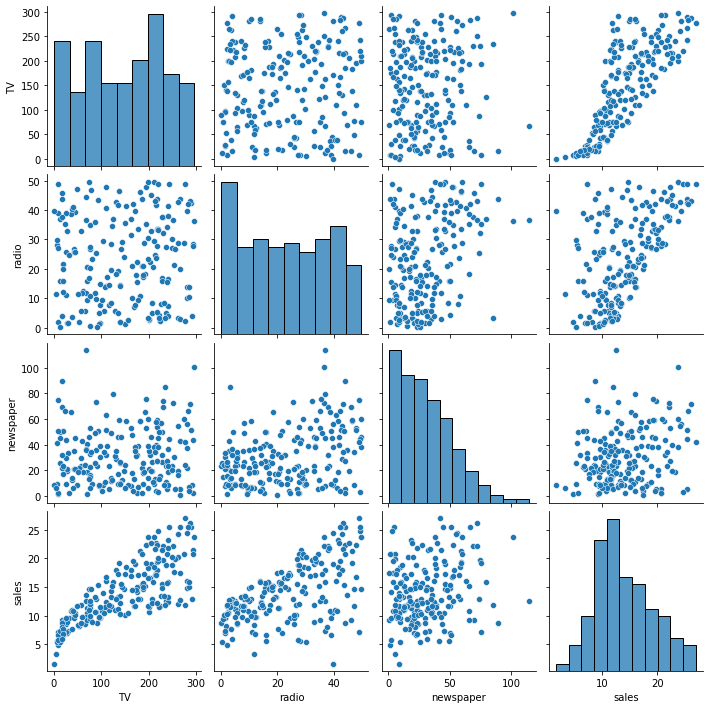

In [78]:
sns.pairplot(df)

This pair plot show that sales and newspaper datas are highly spread data suggesting less impact on sales by newspaper.

In [56]:
df=df.drop('Unnamed: 0',axis=1)

The Column 'Unnamed: 0' is Serial number so it does not have any impact on Target. Hence it is dropped

In [57]:
x=df.drop('sales',axis=1)
y1=df['sales'].to_numpy()
y=pd.DataFrame(y1)
print(x.shape,y.shape)

(200, 3) (200, 1)


Deriving x anf y for training and testing of models.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [79]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuarcy is :- {r2_score(y_test,pred_test)}')
    print('\n')    

At random state 0,the training accuracy is :- 0.9067310470421579
At random state 0, the testing accuarcy is :- 0.8603266589624269


At random state 1,the training accuracy is :- 0.8960584737304588
At random state 1, the testing accuarcy is :- 0.8923729398191854


At random state 2,the training accuracy is :- 0.9150350089998974
At random state 2, the testing accuarcy is :- 0.7592508398088201


At random state 3,the training accuracy is :- 0.8932440832803923
At random state 3, the testing accuarcy is :- 0.9130534635257328


At random state 4,the training accuracy is :- 0.8911442647112345
At random state 4, the testing accuarcy is :- 0.909048056555952


At random state 5,the training accuracy is :- 0.8957690800179244
At random state 5, the testing accuarcy is :- 0.8985073112927844


At random state 6,the training accuracy is :- 0.8917198082054384
At random state 6, the testing accuarcy is :- 0.9218829193348371


At random state 7,the training accuracy is :- 0.893102275906501
At random sta

At random state 63,the training accuracy is :- 0.8949900229388849
At random state 63, the testing accuarcy is :- 0.9023787484509069


At random state 64,the training accuracy is :- 0.8978677291293877
At random state 64, the testing accuarcy is :- 0.8819051319498677


At random state 65,the training accuracy is :- 0.8971619049782464
At random state 65, the testing accuarcy is :- 0.8934471464450051


At random state 66,the training accuracy is :- 0.8985403197298691
At random state 66, the testing accuarcy is :- 0.8902297606019217


At random state 67,the training accuracy is :- 0.8997106069134608
At random state 67, the testing accuarcy is :- 0.8810491785621681


At random state 68,the training accuracy is :- 0.9001781108442838
At random state 68, the testing accuarcy is :- 0.8700654898448276


At random state 69,the training accuracy is :- 0.8870604323769672
At random state 69, the testing accuarcy is :- 0.9240604174629404


At random state 70,the training accuracy is :- 0.8862591705322

Here Random State of 92 gives highest accuracy of 95%

# Cross Validation Score

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At Cross fold {j} the cv score is {cv_mean}, accuracy score of training is {train_accuracy} and accuracy score of testing is {test_accuracy}')
    print('\n')


At Cross fold 2 the cv score is 0.8894513034426873, accuracy score of training is 0.890628886292566 and accuracy score of testing is 0.9205101891144187


At Cross fold 3 the cv score is 0.8918110113222896, accuracy score of training is 0.890628886292566 and accuracy score of testing is 0.9205101891144187


At Cross fold 4 the cv score is 0.8895735911339817, accuracy score of training is 0.890628886292566 and accuracy score of testing is 0.9205101891144187


At Cross fold 5 the cv score is 0.8861181141421504, accuracy score of training is 0.890628886292566 and accuracy score of testing is 0.9205101891144187


At Cross fold 6 the cv score is 0.8898058071658758, accuracy score of training is 0.890628886292566 and accuracy score of testing is 0.9205101891144187


At Cross fold 7 the cv score is 0.8855723471418672, accuracy score of training is 0.890628886292566 and accuracy score of testing is 0.9205101891144187


At Cross fold 8 the cv score is 0.8822079186150363, accuracy score of traini

This Cross Val Score Shows Accuracy of 92% and Linear Regression Score of 95%.
We also evaluate other models so as to get better accuracy.

In [62]:
print(y_test.shape)
print(x_test.shape)
print(y.shape)

(40, 1)
(40, 3)
(200, 1)


# Regularisation

In [64]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'random_state': 0}


In [65]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9200842849836431

In [66]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8873448372438582

# Ensemble Technique

In [71]:
print(x_train.shape)
print(y_train.shape)

(160, 3)
(160, 1)


In [72]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


 Here we determine which parameters is best suited for the RandomForestRegressor Model. We have criterion as 'mae' and max_features as 'auto'

In [73]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 Score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2 Score 97.49696585797824
Cross Val Score: 97.26332813632314


Using Random Forest Regressor we get the highest Score of 97%. hence we use Random Forest Regressor in our Model.

# Saving the Model

In [ ]:
import pickle
filename='rfcmodel.pkl'
pickle.dump(rf, open(filename,'wb'))

We save the Model in rfcmodel.pkl